<a href="https://colab.research.google.com/github/thasliya0404/projetict/blob/main/District_prediction_new.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from sklearn.metrics import mean_absolute_error, r2_score, mean_squared_error

In [ ]:
df = pd.read_csv('/content/final (1).csv')
df

,Year,Crop,District,Block_name,grand_total_production,grand_total_area,Rain_fall_actual(mm),Rain_fall_deviation(%),Temp_max(C),Temp_min(C)
0,2016,Paddy,TRIVANDRUM,Athiyannoor,0.722,0.29,2636.2,0.79,36.1,24.0
1,2016,Paddy,TRIVANDRUM,Chirayinkeezhu,395.209,154.85,1782.6,-0.15,35.8,23.5
2,2016,Paddy,TRIVANDRUM,Kilimanoor,2320.805,849.80,2019.4,0.01,35.7,23.6
3,2016,Paddy,TRIVANDRUM,Nedumangad,67.662,23.60,2764.3,0.75,35.9,23.4
4,2016,Paddy,TRIVANDRUM,Nemom,71.793,40.50,2808.3,0.79,36.0,24.3
...,...,...,...,...,...,...,...,...,...,...
5467,2024,Pepper,KASARAGOD,Karaduka,204.178,376.42,2843.0,-0.36,38.9,19.5
5468,2024,Pepper,KASARAGOD,Kasaragod,472.445,906.22,2834.8,-0.24,38.8,19.1
5469,2024,Pepper,KASARAGOD,Manjeswar,208.349,517.80,2912.5,-23.00,38.7,19.9
5470,2024,Pepper,KASARAGOD,Nileshwar,55.248,103.90,2681.9,-0.32,39.2,18.2


In [ ]:
df.shape

(5472, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5472 entries, 0 to 5471
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    5472 non-null   int64  
 1   Crop                    5472 non-null   object 
 2   District                5472 non-null   object 
 3   Block_name              5472 non-null   object 
 4   grand_total_production  5472 non-null   float64
 5   grand_total_area        5472 non-null   float64
 6   Rain_fall_actual(mm)    5472 non-null   float64
 7   Rain_fall_deviation(%)  5472 non-null   float64
 8   Temp_max(C)             5472 non-null   float64
 9   Temp_min(C)             5472 non-null   float64
dtypes: float64(6), int64(1), object(3)
memory usage: 427.6+ KB


DATASET CREATION

In [ ]:
df_district = (
    df.groupby(["Year", "Crop", "District"], as_index=False)
      .agg({
          "grand_total_production": "sum",
          "grand_total_area": "sum",
          "Rain_fall_actual(mm)": "mean",
          "Rain_fall_deviation(%)": "mean",
          "Temp_max(C)": "mean","Temp_min(C)":"mean"

      })
)
df_district

,Year,Crop,District,grand_total_production,grand_total_area,Rain_fall_actual(mm),Rain_fall_deviation(%),Temp_max(C),Temp_min(C)
0,2016,Banana,ALAPPUZHA,3824.150,436.21,2485.066667,-0.115833,35.316667,23.675000
1,2016,Banana,ERNAKULAM,44525.930,4758.15,2848.607143,-0.086429,36.014286,23.142857
2,2016,Banana,IDUKKI,29744.120,3437.49,2554.175000,0.226250,34.050000,15.375000
3,2016,Banana,KANNUR,18938.000,2034.24,2691.336364,-0.183636,37.854545,21.845455
4,2016,Banana,KASARAGOD,6941.590,632.58,2622.516667,0.023333,38.233333,19.116667
...,...,...,...,...,...,...,...,...,...
499,2024,Tapioca,PALAKKAD,45565.416,1134.58,1857.969231,-0.101538,40.153846,19.846154
500,2024,Tapioca,PATHANAMTHITTA,163936.121,3186.60,2912.087500,-0.548750,35.587500,22.212500
501,2024,Tapioca,THRISSUR,43770.757,966.86,2456.456250,0.113125,36.950000,22.943750
502,2024,Tapioca,TRIVANDRUM,399163.146,11854.58,2557.081818,19.805455,36.609091,23.854545


TARGET COLUMN CREATION

In [ ]:
df_district["Yield"] = df_district["grand_total_production"] / df_district["grand_total_area"]
df_district

,Year,Crop,District,grand_total_production,grand_total_area,Rain_fall_actual(mm),Rain_fall_deviation(%),Temp_max(C),Temp_min(C),Yield
0,2016,Banana,ALAPPUZHA,3824.150,436.21,2485.066667,-0.115833,35.316667,23.675000,8.766764
1,2016,Banana,ERNAKULAM,44525.930,4758.15,2848.607143,-0.086429,36.014286,23.142857,9.357824
2,2016,Banana,IDUKKI,29744.120,3437.49,2554.175000,0.226250,34.050000,15.375000,8.652860
3,2016,Banana,KANNUR,18938.000,2034.24,2691.336364,-0.183636,37.854545,21.845455,9.309619
4,2016,Banana,KASARAGOD,6941.590,632.58,2622.516667,0.023333,38.233333,19.116667,10.973458
...,...,...,...,...,...,...,...,...,...,...
499,2024,Tapioca,PALAKKAD,45565.416,1134.58,1857.969231,-0.101538,40.153846,19.846154,40.160602
500,2024,Tapioca,PATHANAMTHITTA,163936.121,3186.60,2912.087500,-0.548750,35.587500,22.212500,51.445466
501,2024,Tapioca,THRISSUR,43770.757,966.86,2456.456250,0.113125,36.950000,22.943750,45.271039
502,2024,Tapioca,TRIVANDRUM,399163.146,11854.58,2557.081818,19.805455,36.609091,23.854545,33.671640


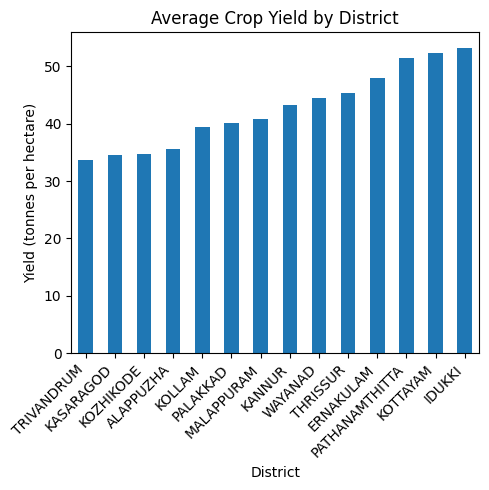

In [ ]:
data9 = df_district[(df_district['Year'] == 2024) & (df_district['Crop'] == 'Tapioca')]

mean_yield = data9.groupby('District')['Yield'].mean().sort_values()

plt.figure(figsize=(5,5))
mean_yield.plot(kind='bar')
plt.title("Average Crop Yield by District")
plt.ylabel("Yield (tonnes per hectare)")
plt.xlabel("District")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
df_district.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 504 entries, 0 to 503
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Year                    504 non-null    int64  
 1   Crop                    504 non-null    object 
 2   District                504 non-null    object 
 3   grand_total_production  504 non-null    float64
 4   grand_total_area        504 non-null    float64
 5   Rain_fall_actual(mm)    504 non-null    float64
 6   Rain_fall_deviation(%)  504 non-null    float64
 7   Temp_max(C)             504 non-null    float64
 8   Temp_min(C)             504 non-null    float64
 9   Yield                   504 non-null    float64
dtypes: float64(7), int64(1), object(2)
memory usage: 39.5+ KB


OUTLIER TREATMENT

In [ ]:
num_cols= df_district.select_dtypes(np.number)

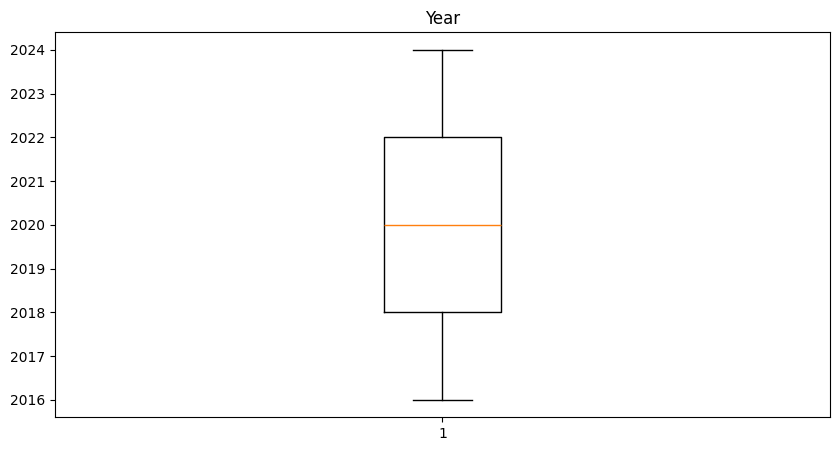

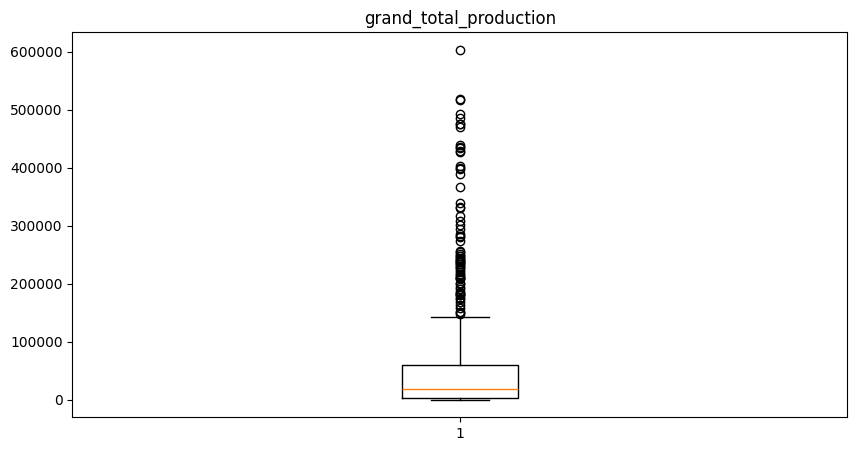

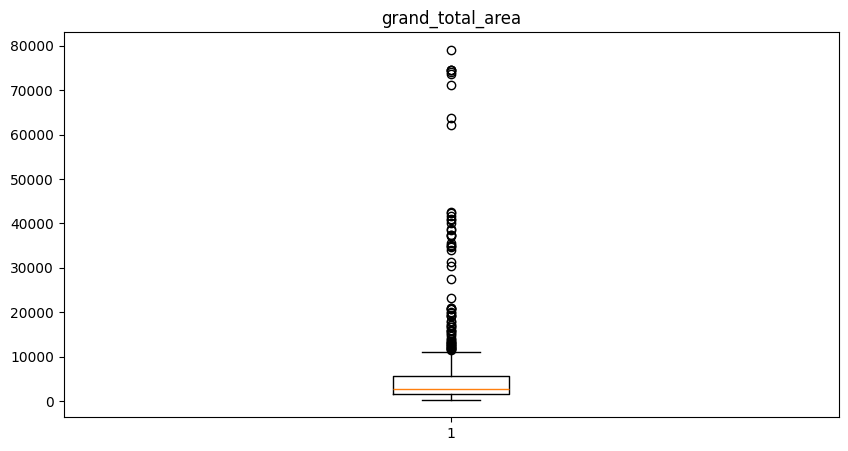

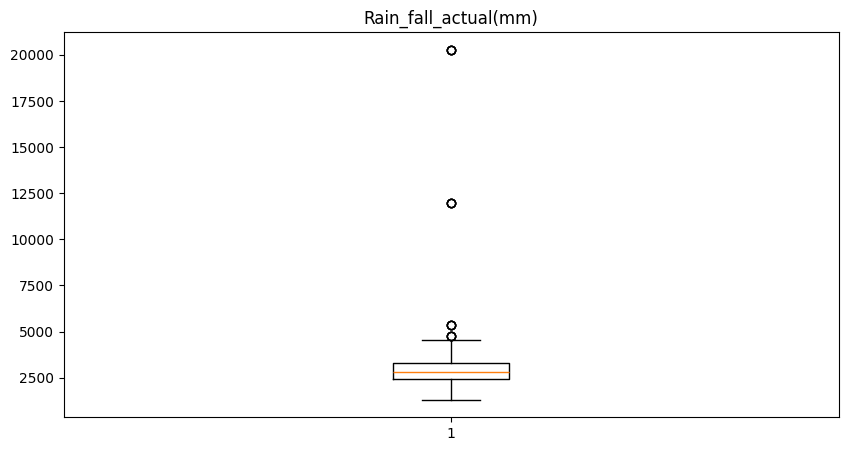

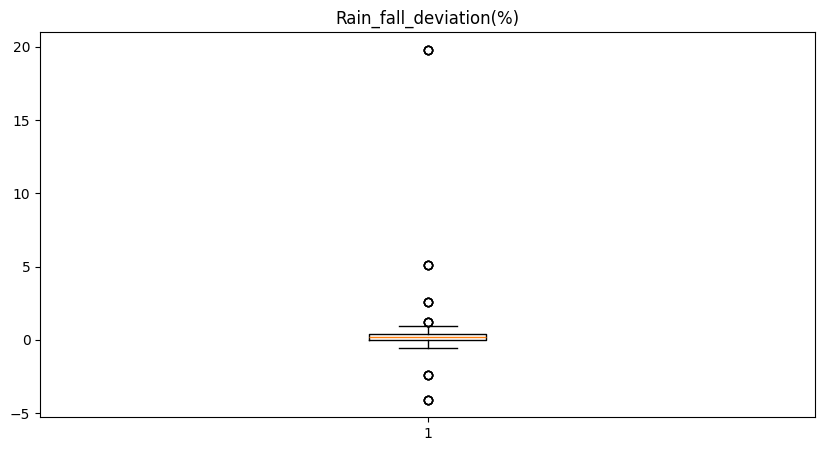

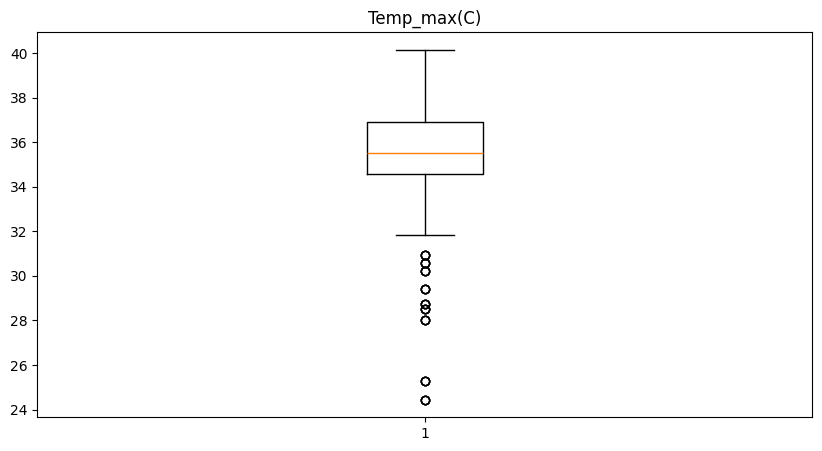

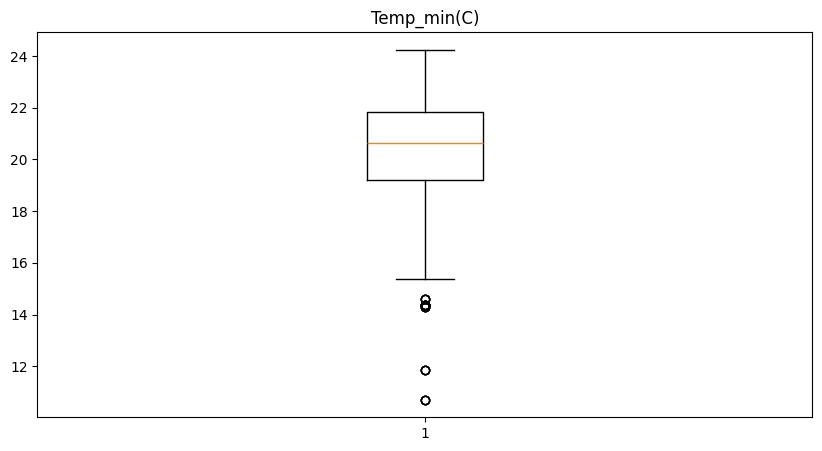

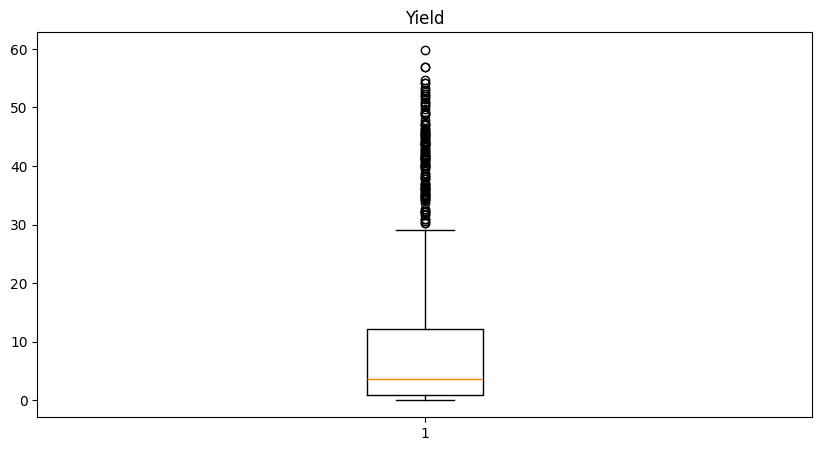

In [ ]:
for i in num_cols:
  plt.figure(figsize=(10,5))
  plt.boxplot(df_district[i])
  plt.title(i)

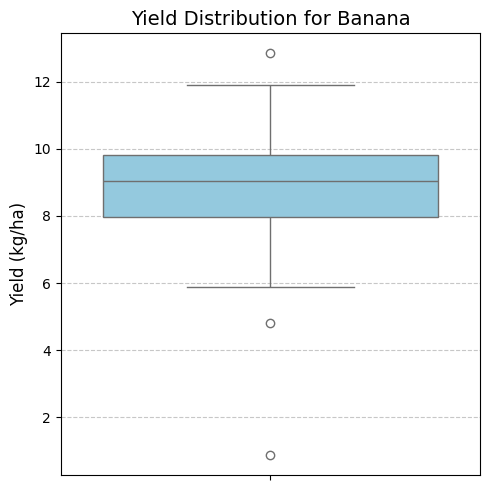

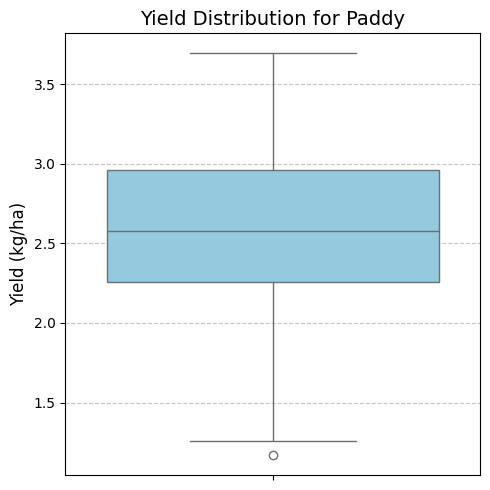

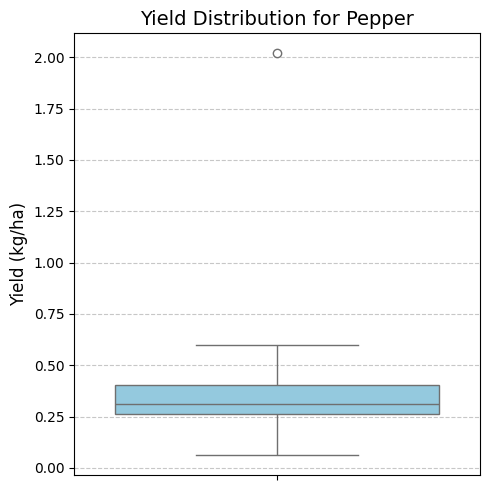

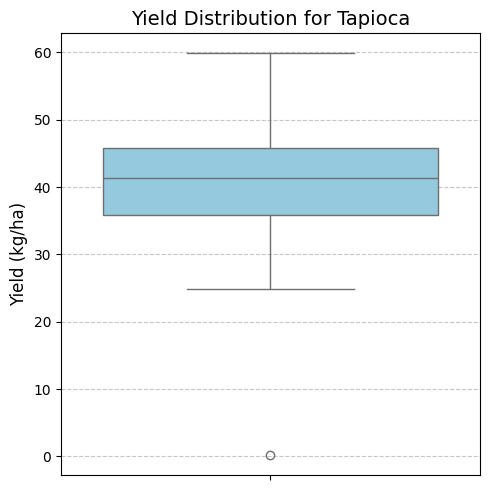

In [ ]:
df_district['Crop'] = df_district['Crop'].astype('category')

# Loop through each crop and draw a boxplot
for crop in df_district['Crop'].unique():
    crop_data = df_district[df_district['Crop'] == crop]

    plt.figure(figsize=(5, 5))
    sns.boxplot(y='Yield', data=crop_data, color='skyblue')
    plt.title(f'Yield Distribution for {crop}', fontsize=14)
    plt.ylabel('Yield (kg/ha)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

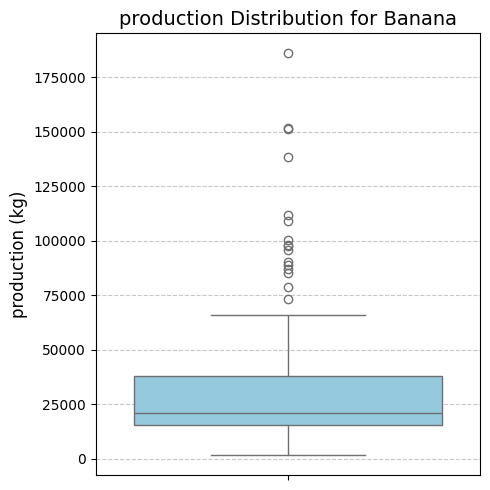

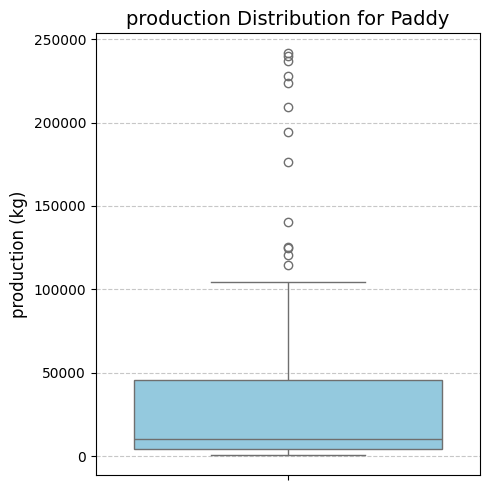

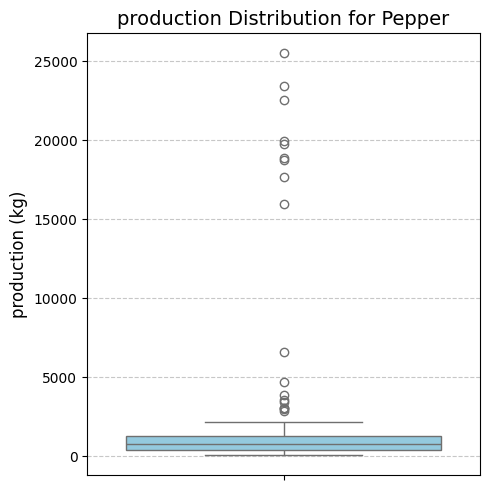

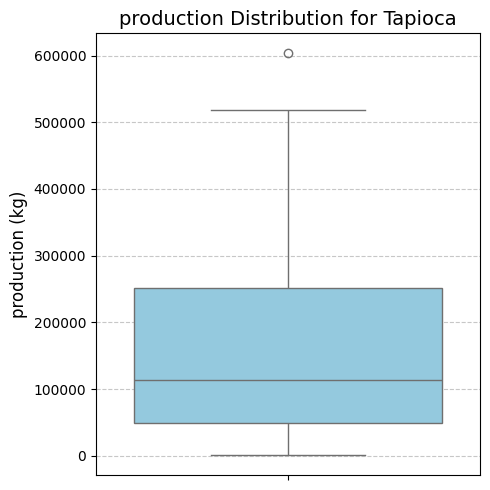

In [ ]:
for crop in df_district['Crop'].unique():
    crop_data = df_district[df_district['Crop'] == crop]

    plt.figure(figsize=(5, 5))
    sns.boxplot(y='grand_total_production', data=crop_data, color='skyblue')
    plt.title(f'production Distribution for {crop}', fontsize=14)
    plt.ylabel('production (kg)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

In [ ]:
list1 = ['Pepper', 'Paddy', 'Banana']     #   Treating outliers for each crop separately

def winsorize_crop(data, col='grand_total_production', lower_quantile=0, upper_quantile=0.99):
    for crop in list1:
        mask = data['Crop'] == crop
        lower = data.loc[mask, col].quantile(lower_quantile)
        upper = data.loc[mask, col].quantile(upper_quantile)
        data.loc[mask, col] = data.loc[mask, col].clip(lower, upper)
    return data
df_district = winsorize_crop(df_district, col='grand_total_production', lower_quantile=0, upper_quantile=0.97)


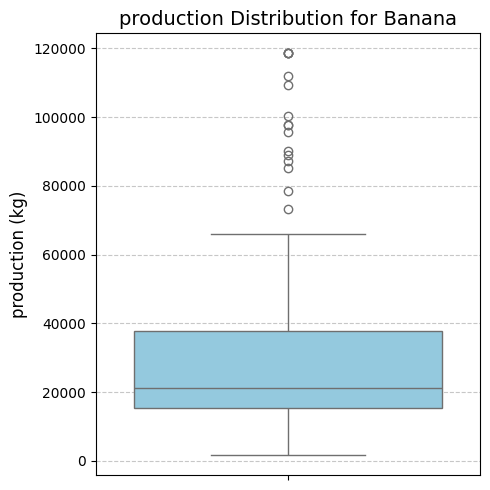

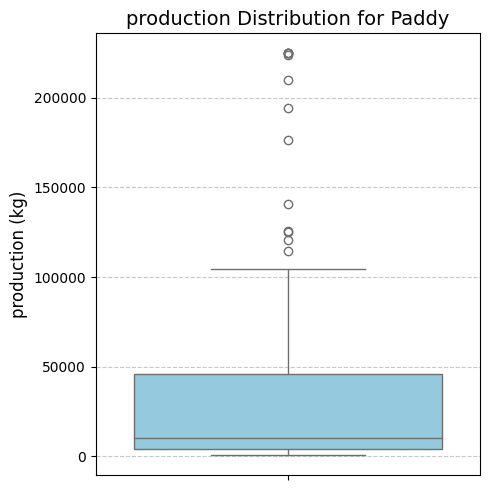

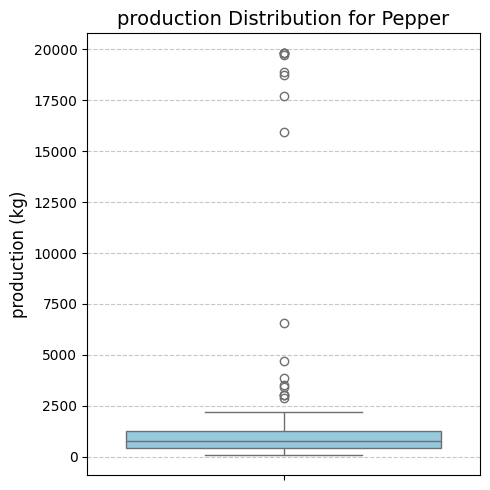

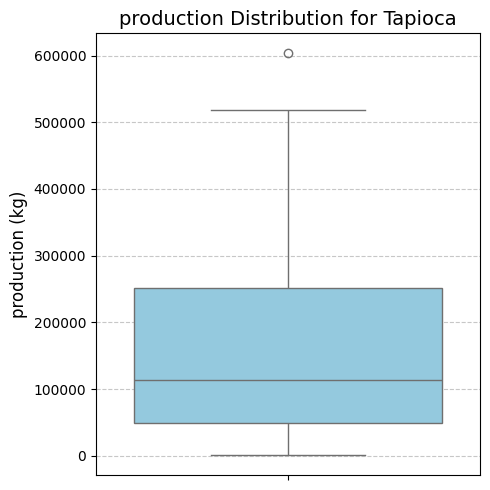

In [ ]:
for crop in df_district['Crop'].unique():
    crop_data = df_district[df_district['Crop'] == crop]

    plt.figure(figsize=(5, 5))
    sns.boxplot(y='grand_total_production', data=crop_data, color='skyblue')
    plt.title(f'production Distribution for {crop}', fontsize=14)
    plt.ylabel('production (kg)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


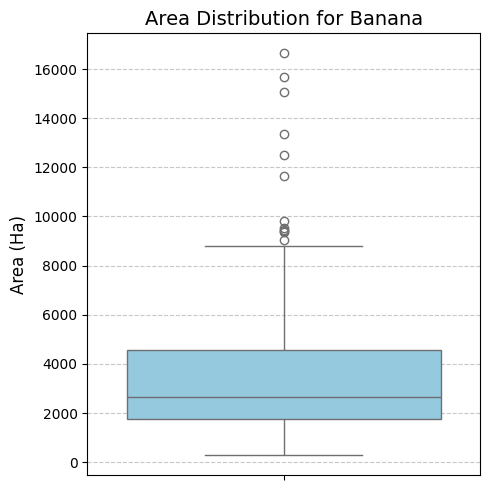

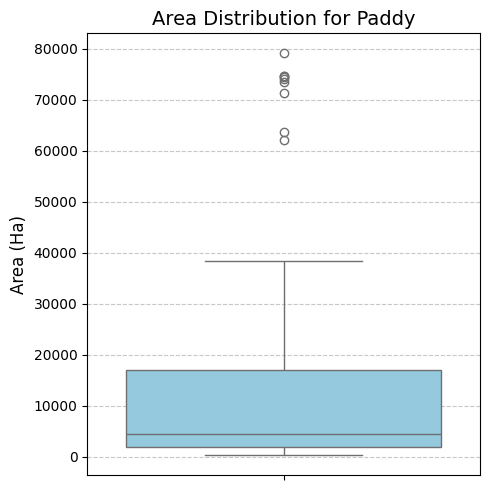

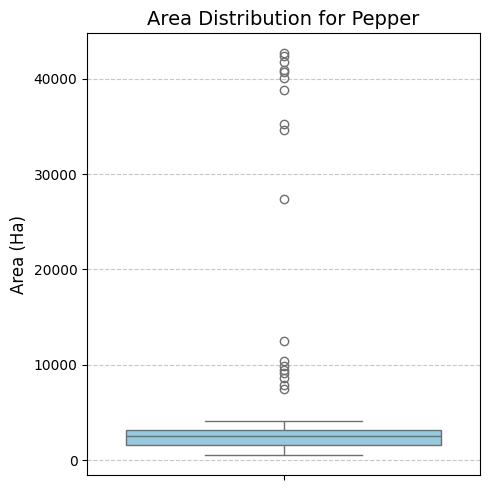

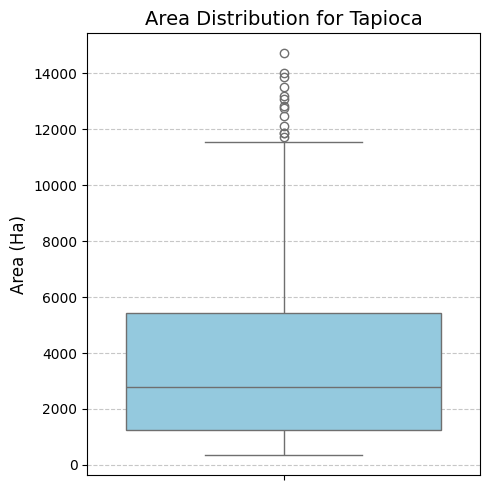

In [ ]:
for crop in df_district['Crop'].unique():
    crop_data = df_district[df_district['Crop'] == crop]   #  filter for each crop

    plt.figure(figsize=(5, 5))
    sns.boxplot(y='grand_total_area', data=crop_data, color='skyblue')  #  correct
    plt.title(f'Area Distribution for {crop}', fontsize=14)
    plt.ylabel('Area (Ha)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


In [ ]:
def winsorize_crop(data, col='grand_total_area', lower_quantile=0, upper_quantile=0.99):
    crops = data['Crop'].unique()

    for crop in crops:
        mask = data['Crop'] == crop
        lower = data.loc[mask, col].quantile(lower_quantile)
        upper = data.loc[mask, col].quantile(upper_quantile)
        data.loc[mask, col] = data.loc[mask, col].clip(lower, upper)

    return data
df_district = winsorize_crop(df_district, col='grand_total_area', lower_quantile=0, upper_quantile=0.99)

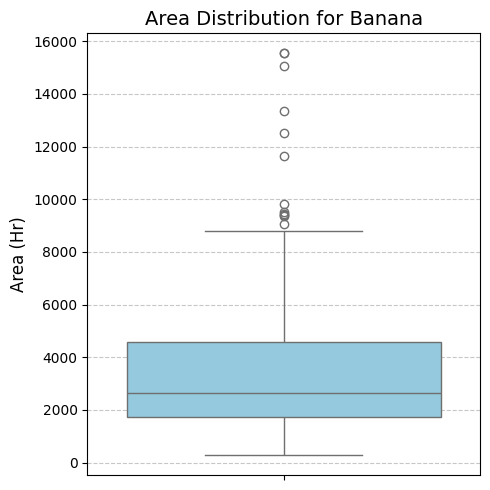

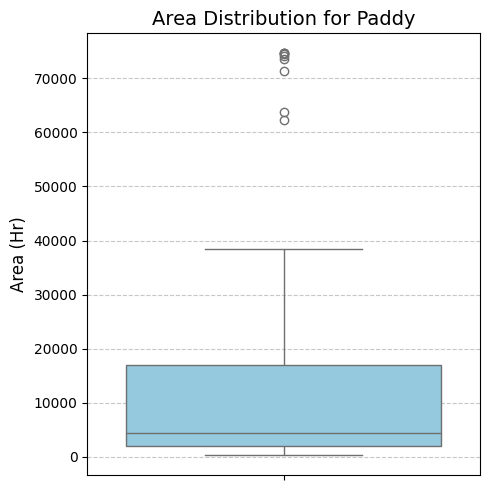

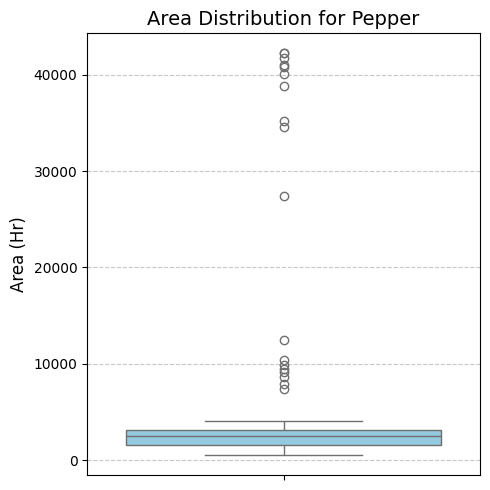

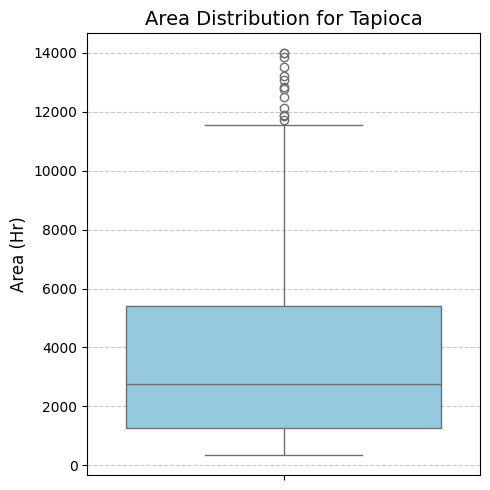

In [ ]:
for crop in df_district['Crop'].unique():
    crop_data = df_district[df_district['Crop'] == crop]

    plt.figure(figsize=(5, 5))
    sns.boxplot(y='grand_total_area', data=crop_data, color='skyblue')
    plt.title(f'Area Distribution for {crop}', fontsize=14)
    plt.ylabel('Area (Hr)', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()

/tmp/ipython-input-3880246160.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='District', y='Temp_max(C)', data=df_district, palette='coolwarm')


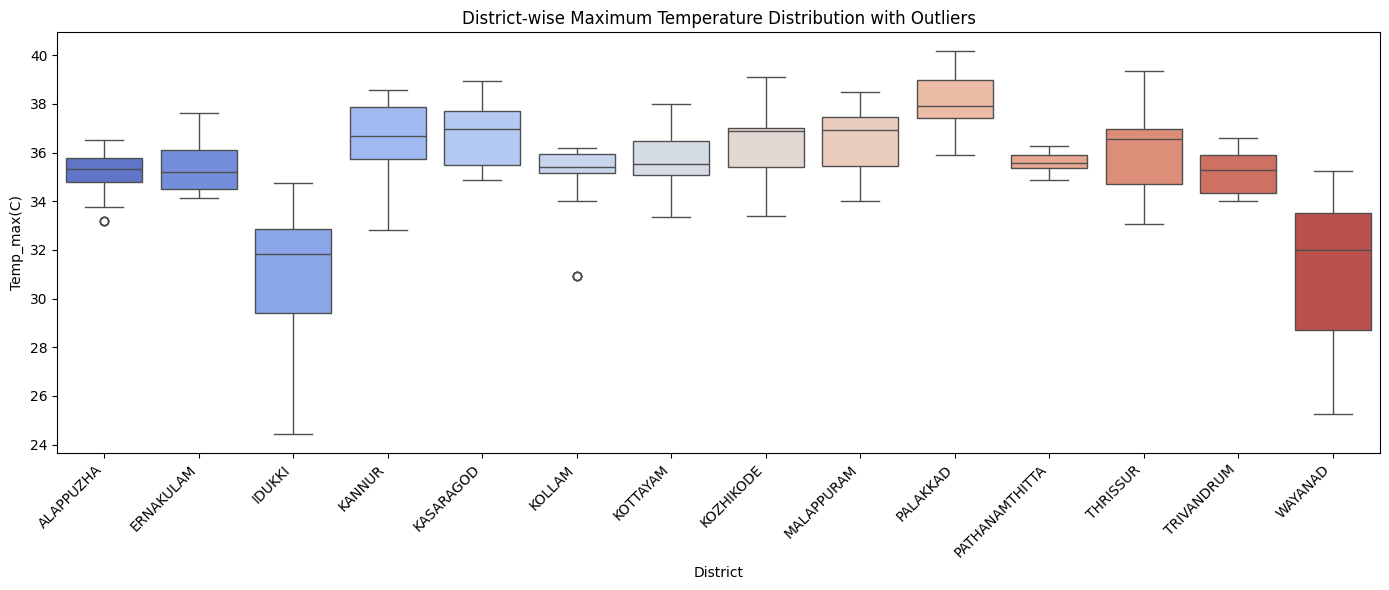

In [ ]:
#Temp_max is treated by taking minimum of minimum of the temperture in district
plt.figure(figsize=(14, 6))
sns.boxplot(x='District', y='Temp_max(C)', data=df_district, palette='coolwarm')
plt.title('District-wise Maximum Temperature Distribution with Outliers')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [ ]:
# Replace all max temperature values below 32°C for Kollam
df.loc[(df['District'] == 'KOLLAM') & (df['Temp_max(C)'] < 30), 'Temp_max(C)'] = 32
df.loc[(df['District'] == 'ALAPPUZHA') & (df['Temp_max(C)'] < 30), 'Temp_max(C)'] = 32

/tmp/ipython-input-4033112910.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='District', y='Temp_min(C)', data=df_district, palette='coolwarm')


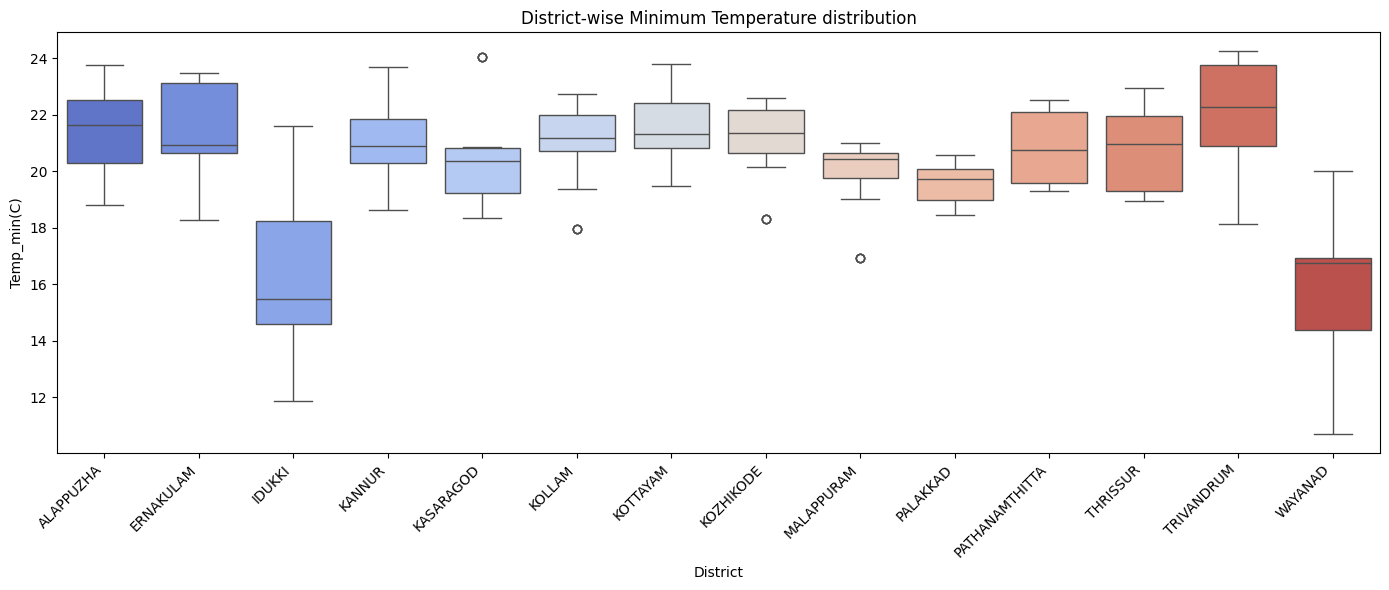

In [ ]:
plt.figure(figsize=(14, 6))
sns.boxplot(x='District', y='Temp_min(C)', data=df_district, palette='coolwarm')
plt.title('District-wise Minimum Temperature distribution')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

Feature engineering

In [ ]:
df_district['Temp_mean(C)'] = (df_district['Temp_max(C)']+df_district['Temp_min(C)'])/2    # creation of the feature GDD_Year
T_BASE = {'Paddy': 14, 'Tapioca': 10, 'Pepper': 10, 'Banana': 8}
df_district['Tbase'] = df_district['Crop'].map(T_BASE)
df_district['GDD_Year'] =  np.maximum(0, df_district['Temp_mean(C)'] - df_district['Tbase'])
df_district

,Year,Crop,District,grand_total_production,grand_total_area,Rain_fall_actual(mm),Rain_fall_deviation(%),Temp_max(C),Temp_min(C),Yield,Temp_mean(C),Tbase,GDD_Year
0,2016,Banana,ALAPPUZHA,3824.150,436.21,2485.066667,-0.115833,35.316667,23.675000,8.766764,29.495833,8,21.495833
1,2016,Banana,ERNAKULAM,44525.930,4758.15,2848.607143,-0.086429,36.014286,23.142857,9.357824,29.578571,8,21.578571
2,2016,Banana,IDUKKI,29744.120,3437.49,2554.175000,0.226250,34.050000,15.375000,8.652860,24.712500,8,16.712500
3,2016,Banana,KANNUR,18938.000,2034.24,2691.336364,-0.183636,37.854545,21.845455,9.309619,29.850000,8,21.850000
4,2016,Banana,KASARAGOD,6941.590,632.58,2622.516667,0.023333,38.233333,19.116667,10.973458,28.675000,8,20.675000
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2024,Tapioca,PALAKKAD,45565.416,1134.58,1857.969231,-0.101538,40.153846,19.846154,40.160602,30.000000,10,20.000000
500,2024,Tapioca,PATHANAMTHITTA,163936.121,3186.60,2912.087500,-0.548750,35.587500,22.212500,51.445466,28.900000,10,18.900000
501,2024,Tapioca,THRISSUR,43770.757,966.86,2456.456250,0.113125,36.950000,22.943750,45.271039,29.946875,10,19.946875
502,2024,Tapioca,TRIVANDRUM,399163.146,11854.58,2557.081818,19.805455,36.609091,23.854545,33.671640,30.231818,10,20.231818


In [ ]:
df_district = df_district.sort_values(by=["Crop", "District", "Year"]).reset_index(drop=True)
df_district

,Year,Crop,District,grand_total_production,grand_total_area,Rain_fall_actual(mm),Rain_fall_deviation(%),Temp_max(C),Temp_min(C),Yield,Temp_mean(C),Tbase,GDD_Year
0,2016,Banana,ALAPPUZHA,3824.150,436.21,2485.066667,-0.115833,35.316667,23.675000,8.766764,29.495833,8,21.495833
1,2017,Banana,ALAPPUZHA,3466.214,487.31,2041.000000,-0.271667,36.500000,20.300000,7.112955,28.400000,8,20.400000
2,2018,Banana,ALAPPUZHA,4038.857,541.65,2421.933333,0.090833,35.758333,20.875000,7.456581,28.316667,8,20.316667
3,2019,Banana,ALAPPUZHA,1715.127,290.02,3198.908333,0.177500,34.808333,20.183333,5.913823,27.495833,8,19.495833
4,2020,Banana,ALAPPUZHA,2180.394,353.51,3131.458333,0.155000,33.750000,22.525000,6.167842,28.137500,8,20.137500
...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2020,Tapioca,WAYANAD,44476.783,1064.39,2703.975000,0.700000,35.250000,17.250000,41.786171,26.250000,10,16.250000
500,2021,Tapioca,WAYANAD,62269.048,1322.49,2942.675000,0.817500,32.000000,10.700000,47.084702,21.350000,10,11.350000
501,2022,Tapioca,WAYANAD,48604.882,1115.23,2674.775000,0.617500,25.275000,14.375000,43.582832,19.825000,10,9.825000
502,2023,Tapioca,WAYANAD,41216.350,930.67,2739.950000,0.637500,30.565000,14.275000,44.286750,22.420000,10,12.420000


In [ ]:
df_district['Yield'] = df_district['Yield']  # Duplicate the 'Yield' column for use as past yield
df_district['Yield_target'] = df_district['Yield']  # This will be the actual target column for prediction


In [ ]:
df_district

,Year,Crop,District,grand_total_production,grand_total_area,Rain_fall_actual(mm),Rain_fall_deviation(%),Temp_max(C),Temp_min(C),Yield,Temp_mean(C),Tbase,GDD_Year,Yield_target
0,2016,Banana,ALAPPUZHA,3824.150,436.21,2485.066667,-0.115833,35.316667,23.675000,8.766764,29.495833,8,21.495833,8.766764
1,2017,Banana,ALAPPUZHA,3466.214,487.31,2041.000000,-0.271667,36.500000,20.300000,7.112955,28.400000,8,20.400000,7.112955
2,2018,Banana,ALAPPUZHA,4038.857,541.65,2421.933333,0.090833,35.758333,20.875000,7.456581,28.316667,8,20.316667,7.456581
3,2019,Banana,ALAPPUZHA,1715.127,290.02,3198.908333,0.177500,34.808333,20.183333,5.913823,27.495833,8,19.495833,5.913823
4,2020,Banana,ALAPPUZHA,2180.394,353.51,3131.458333,0.155000,33.750000,22.525000,6.167842,28.137500,8,20.137500,6.167842
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
499,2020,Tapioca,WAYANAD,44476.783,1064.39,2703.975000,0.700000,35.250000,17.250000,41.786171,26.250000,10,16.250000,41.786171
500,2021,Tapioca,WAYANAD,62269.048,1322.49,2942.675000,0.817500,32.000000,10.700000,47.084702,21.350000,10,11.350000,47.084702
501,2022,Tapioca,WAYANAD,48604.882,1115.23,2674.775000,0.617500,25.275000,14.375000,43.582832,19.825000,10,9.825000,43.582832
502,2023,Tapioca,WAYANAD,41216.350,930.67,2739.950000,0.637500,30.565000,14.275000,44.286750,22.420000,10,12.420000,44.286750


ONE-HOT CODE ENCODING OF CROPS AND DISTRICT

In [ ]:
df_encoded = pd.get_dummies(df_district, columns=['Crop','District'])

SPLITTING INTO TRAINING AND TESTING

In [ ]:
train_years = [2016, 2017,2018,2019,2020,2021,2022,2023]
test_years = [2024]

train_df = df_encoded[df_encoded['Year'].isin(train_years)].copy()
test_df = df_encoded[df_encoded['Year'].isin(test_years)].copy()


CHOOSING OF COLUMNS FOR TRAINING

In [ ]:
feature_cols = [
    "grand_total_production",
    "grand_total_area",
    "Rain_fall_actual(mm)",
    "GDD_Year",
    "Yield"   #  include past yield as input feature
]+ [col for col in df_encoded.columns if col.startswith("Crop_") or col.startswith("District_")]

target_col = 'Yield_target'

SCALING

In [ ]:
# Scale features as usual
feature_scaler = MinMaxScaler()
train_df[feature_cols] = feature_scaler.fit_transform(train_df[feature_cols])

# Transform target with log1p
train_df[target_col] = np.log1p(train_df[target_col].values)


CREATION OF SEQUENCE TO BE INSERTED IN AN LSTM MODEL

In [ ]:
def create_sequences(data, seq_length=5):
    X, y = [], []
    for i in range(len(data) - seq_length):
        X.append(data.iloc[i:i+seq_length][feature_cols].values)
        y.append(data.iloc[i+seq_length][target_col])
    return np.array(X), np.array(y)

In [ ]:
X_train_list, y_train_list = [], []
seq_length = 5
for crop_name in df_district['Crop'].unique():
    for district_name in df_district['District'].unique():
        # Filter for this crop-district combination using one-hot columns
        crop_col = f"Crop_{crop_name}"
        district_col = f"District_{district_name}"
        group = train_df[(train_df[crop_col]==1) & (train_df[district_col]==1)].sort_values('Year')
        if len(group) > seq_length:
            X, y = create_sequences(group, seq_length=seq_length)
            X_train_list.append(X)
            y_train_list.append(y)

X_train = np.vstack(X_train_list)
y_train = np.hstack(y_train_list)

In [ ]:
X_test_list, y_test_list = [], []

for crop_name in df_district['Crop'].unique():
    for district_name in df_district['District'].unique():
        crop_col = f"Crop_{crop_name}"
        district_col = f"District_{district_name}"

        # Get the historical data from train_df to form the input sequence for X_test.
        # These are the past 'seq_length' years for predicting the test_year.
        historical_input_data = train_df[
            (train_df[crop_col] == 1) & (train_df[district_col] == 1)
        ].sort_values('Year')

        # Get the target data for the prediction year (2024) from test_df.
        target_output_data = test_df[
            (test_df[crop_col] == 1) & (test_df[district_col] == 1)
        ].sort_values('Year') # Should only contain 2024 data for this crop/district

        # We need at least 'seq_length' years of historical data to form an input sequence
        # AND we need a corresponding target value in the test set for the prediction year.
        if len(historical_input_data) >= seq_length and not target_output_data.empty:
            # The input sequence for X_test consists of the last 'seq_length' years
            # from the historical_input_data (which comes from train_df).
            X_sequence_for_test = historical_input_data.tail(seq_length)[feature_cols].values
            X_test_list.append(X_sequence_for_test)

            # The target for this X_test sequence is the 'Yield' from the prediction year (2024)
            # from the target_output_data (which comes from test_df).
            y_target_for_test = target_output_data.iloc[0][target_col] # Assuming one row for 2024
            y_test_list.append(y_target_for_test)

# Only concatenate if lists are not empty
if X_test_list:
    # Each element in X_test_list is now a (seq_length, num_features) array.
    # np.array will create a (num_samples, seq_length, num_features) array.
    X_test = np.array(X_test_list)
    y_test = np.array(y_test_list)
else:
    print("Warning: No test sequences could be formed for the given criteria. X_test and y_test will be empty.")
    X_test = np.empty((0, seq_length, len(feature_cols)))  # Create empty array with correct dimensions
    y_test = np.empty((0,))

In [ ]:
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)

X_train shape: (168, 5, 23)
y_train shape: (168,)
X_test shape: (56, 5, 23)
y_test shape: (56,)


MODEL CREATION

In [ ]:
n_timesteps = X_train.shape[1]  # seq_length
n_features = X_train.shape[2]   # number of features


# 2️ Build LSTM model

model = Sequential()
model.add(LSTM(64, activation='tanh', input_shape=(n_timesteps, n_features), return_sequences=False))
model.add(Dropout(0.2))
model.add(Dense(32, activation='relu'))
model.add(Dense(1, activation='linear'))  # predict Yield

model.compile(optimizer='adam', loss='mse', metrics=['mae'])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/rnn/rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_1 (LSTM)                   │ (None, 64)             │        22,528 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 32)             │         2,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │            33 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,641 (96.25 KB)

 Trainable params: 24,641 (96.25 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
history = model.fit(X_train, y_train,epochs=15,batch_size=8,validation_split=0.1,shuffle=False,verbose=1)
#   MODEL TRAINING

Epoch 1/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 2s 25ms/step - loss: 4.5035 - mae: 1.9229 - val_loss: 13.2220 - val_mae: 3.6324
Epoch 2/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 2.9508 - mae: 1.5423 - val_loss: 9.6171 - val_mae: 3.0959
Epoch 3/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 1.5125 - mae: 1.0871 - val_loss: 4.1167 - val_mae: 2.0154
Epoch 4/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - loss: 0.3868 - mae: 0.5154 - val_loss: 1.6653 - val_mae: 1.2591
Epoch 5/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - loss: 0.1279 - mae: 0.2921 - val_loss: 0.7002 - val_mae: 0.7671
Epoch 6/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - loss: 0.1155 - mae: 0.2577 - val_loss: 0.2042 - val_mae: 0.3968
Epoch 7/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - loss: 0.0942 - mae: 0.2515 - val_loss: 0.1997 - val_mae: 0.3758
Epoch 8/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step - loss: 0.0542 - mae: 0.1887 - val_loss: 0.1661 - val_mae: 0.3423
Epoch 9/15
19/19 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - loss: 0.0585 -

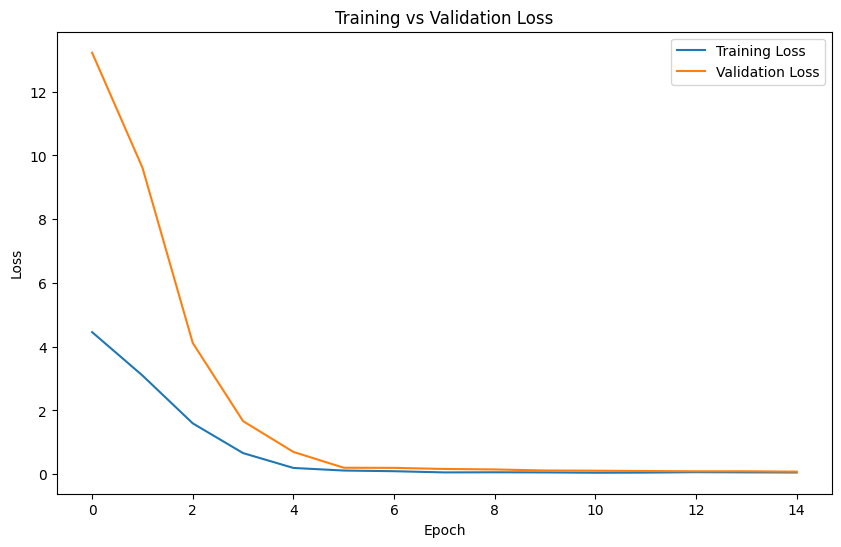

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training vs Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

PREDICTION AND EVALUATION

In [ ]:
y_pred = model.predict(X_test)
y_pred_original = np.expm1(y_pred)


2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 177ms/step


In [ ]:
print("\nModel Performance:")
print("MAE:", mean_absolute_error(y_test, y_pred_original))
print("R²:", r2_score(y_test, y_pred_original))
rmse = np.sqrt(mean_squared_error(y_test,y_pred_original))
print(f"test rmse:{rmse:.3f}")


Model Performance:
MAE: 1.9130958113613965
R²: 0.9408619064332561
test rmse:4.209


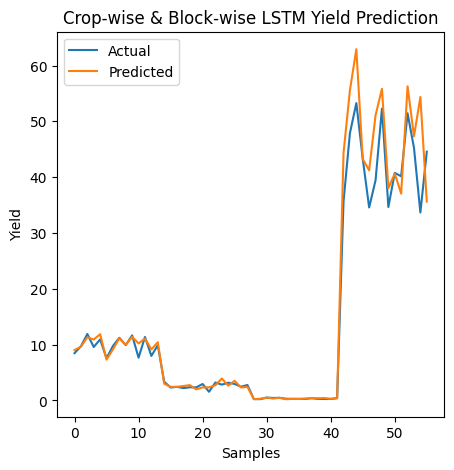

In [ ]:
plt.figure(figsize=(5,5))
plt.plot(y_test, label='Actual')
plt.plot(y_pred_original, label='Predicted')
plt.title('Crop-wise & Block-wise LSTM Yield Prediction')
plt.xlabel('Samples')
plt.ylabel('Yield')
plt.legend()
plt.show()

INDIVIDUAL TESTING

In [ ]:
crop_name = "Pepper"
district_name = "PALAKKAD"
seq_length = 5  # same as used during training


# FILTER LAST SEQ_LENGTH YEARS

last_years_data = train_df[
    (train_df[f'Crop_{crop_name}'] == 1) &
    (train_df[f'District_{district_name}'] == 1)
].sort_values('Year').tail(seq_length)  # last 5 years

if len(last_years_data) < seq_length:
    raise ValueError(f"Not enough historical data to form a sequence for {crop_name}-{district_name}")

# PREPARE FEATURES

seq_input = last_years_data[feature_cols].copy()



# Scale the features using the same scaler as training and reshape for LSTM input
# feature_scaler.transform is used even though data is already scaled because it also converts to NumPy array
# and ensures consistency, then we reshape to add the batch dimension (1 for single prediction).
seq_input_scaled = seq_input.values.reshape(1, seq_length, len(feature_cols))

# PREDICT

y_pred_scaled = model.predict(seq_input_scaled)
y_pred_original = np.expm1(y_pred_scaled) # Inverse log1p transformation

if crop_name == 'Pepper':
  print(f"Predicted {crop_name} Yield for {district_name} in 2025: {(y_pred_original)[0, 0]:.2f}")
else:
  print(f"Predicted {crop_name} Yield for {district_name} in 2025: {(y_pred_original)[0, 0]:.2f}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 60ms/step
Predicted Pepper Yield for PALAKKAD in 2025: 0.41


SAVING THE MODEL AND OTHER DEPENDENCIES

In [ ]:
df_district.to_csv("df_disrtict.csv", index=False)

In [ ]:
from keras.models import load_model

#Save the model architecture + weights + optimizer state
model.save("crop_yield_model1.h5")

In [ ]:
import joblib

# Save the feature scaler
joblib.dump(feature_scaler, "feature_scaler1.save")

['feature_scaler1.save']

In [ ]:
import json

# Save the list of crops and districts used for one-hot encoding
encoding_info = {
    "crops": list(df_district['Crop'].unique()),
    "districts": list(df_district['District'].unique()),
    "feature_columns": feature_cols,  # all numeric/scaled feature column name
    "target_column" : target_col
}

with open("encoding_info.json", "w") as f:
    json.dump(encoding_info, f)